In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
from corner import corner
import h5py 

In [6]:
N = 100
time = np.linspace(0,N,N)
dn = 2/ (N-1)
sigma = 1
beta = 5

In [7]:
true_data = np.loadtxt("../data/full_data_transdimensional_5_5_1_100.csv")
true_clean_data = np.loadtxt("../data/clean_data_transdimensional_5_5_1_100.csv")

In [8]:
def cheb_fn(P,coeff,x ):
    return np.sum(coeff[:P] * np.cos(np.arange(P)*np.arccos(x)))

In [9]:
data = gmcmc.RJPTMCMC_unpack_file("../data/output_trans.hdf5")
#dim_fixed = [5,6,4,3]
data_fixed_1 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim1.hdf5")
data_fixed_2 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim2.hdf5")
data_fixed_3 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim3.hdf5")
data_fixed_4 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim4.hdf5")

f1 = h5py.File("../data/output_trans_fixed_dim1.hdf5")
f2 = h5py.File("../data/output_trans_fixed_dim2.hdf5")
f3 = h5py.File("../data/output_trans_fixed_dim3.hdf5")
f4 = h5py.File("../data/output_trans_fixed_dim4.hdf5")

evidence1 = f1["MCMC_METADATA"]["EVIDENCE"][0]
evidence2 = f2["MCMC_METADATA"]["EVIDENCE"][0]
evidence3 = f3["MCMC_METADATA"]["EVIDENCE"][0]
evidence4 = f4["MCMC_METADATA"]["EVIDENCE"][0]
print(evidence1,evidence2,evidence3,evidence4)

IL1 = f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL2 = f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL3 = f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL4 = f4["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
ILNUM1 = f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM2 = f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM3 = f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM4 = f4["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
T1 = f1["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T2 = f2["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T3 = f3["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T4 = f4["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]

trim:  0
ac:  16.6
trim:  0
ac:  19.4
trim:  0
ac:  14.4
trim:  0
ac:  11.4
-151.25118357045355 -141.27632849856428 -152.16412394043797 -158.1436365905243


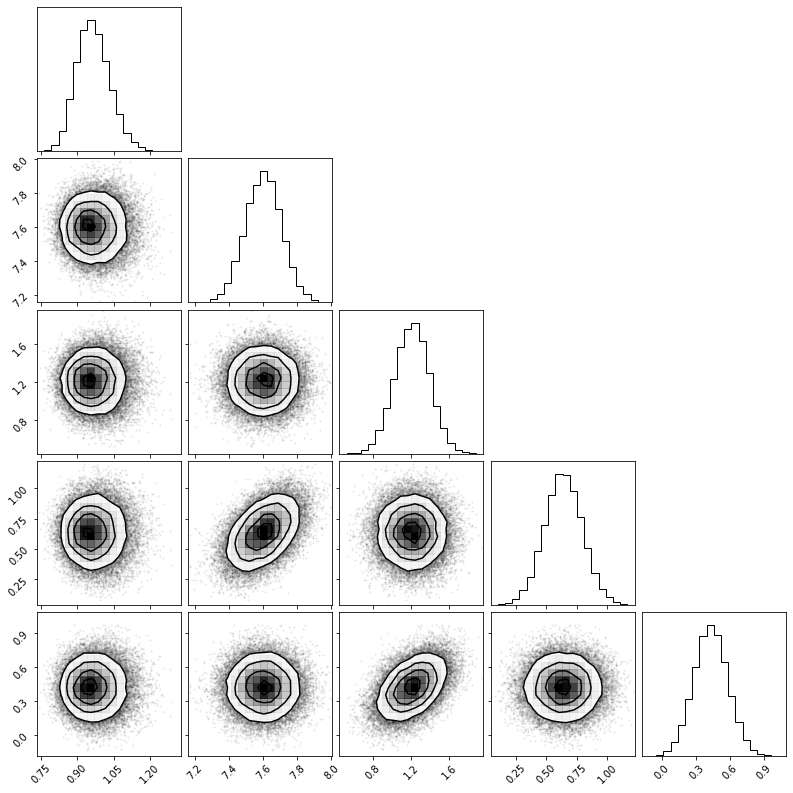

In [32]:
fig = corner(data_fixed_1)

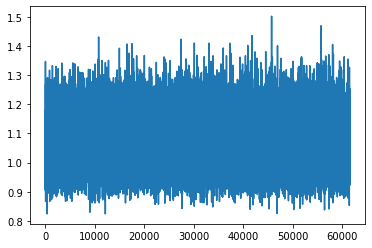

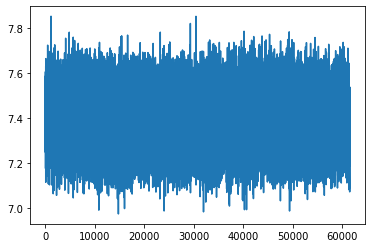

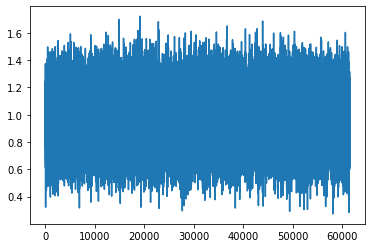

In [44]:
for x in data_fixed_4.T:
    plt.plot(x)
    plt.show()
    plt.close()

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
Bayes factor 5/6 (RJ):  406.46403712296984
Bayes factor 5/6 (PTMCMC):  4.6555981237715955e-05
Bayes factor 5/4 (RJ):  0.04332061224434283
Bayes factor 5/4 (PTMCMC):  2.491638110774967
Bayes factor 5/3 (RJ):  0.09843873356764973
Bayes factor 5/3 (PTMCMC):  984.8142257362017
Bayes factor 4/3 (RJ):  2.2723301557333064
Bayes factor 4/3 (PTMCMC):  395.24769727891896


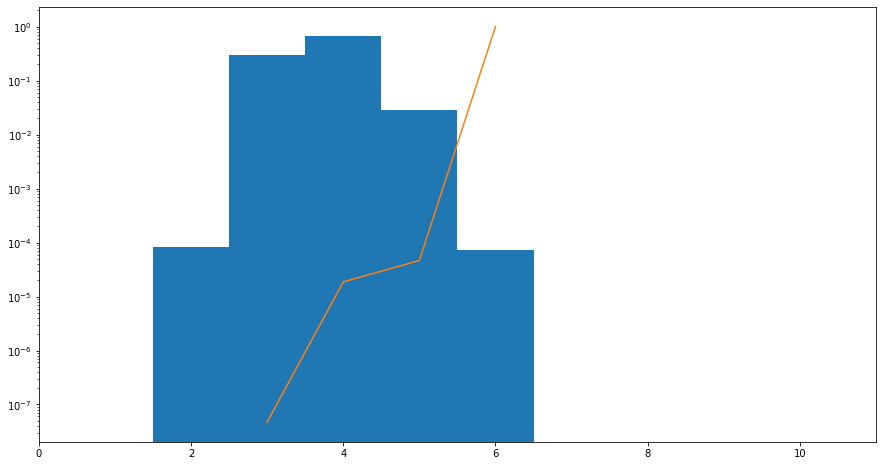

In [10]:
bins = np.linspace(0.5,len(data[1][0])+.5,len(data[1][0])+1)
mids = bins[1:] - .5
print(bins)
dims = np.sum(data[1],axis=1)
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(evidence1 - evidence2))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(evidence1 - evidence3))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(evidence1 - evidence4))
print("Bayes factor 4/3 (RJ): ",np.sum(dims == 4) / np.sum(dims==3))
print("Bayes factor 4/3 (PTMCMC): ",np.exp(evidence3 -evidence4))

fig, ax = plt.subplots(figsize=[15,8])
ax.hist(dims,bins=bins,log=True,density=True)
total = np.sum(np.exp([evidence4,evidence3,evidence1,evidence2]))
#print(total)
ax.plot(mids[2:6],np.exp([evidence4,evidence3,evidence1,evidence2])/total)
#total = np.sum(np.exp([lnE[3],lnE[2],lnE[0],lnE[1]]))
#print(total)
#plt.plot(mids[2:6],np.exp([lnE[3],lnE[2],lnE[0],lnE[1]])/total)

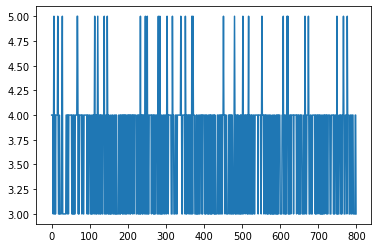

In [7]:
plt.plot(dims[::5000])

In [11]:
recon = [[cheb_fn(np.sum(data[1][x,1:]), data[0][x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed1 = [[cheb_fn(len(data_fixed_1[x,1:]), data_fixed_1[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed2 = [[cheb_fn(len(data_fixed_2[x,1:]), data_fixed_2[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed3 = [[cheb_fn(len(data_fixed_3[x,1:]), data_fixed_3[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed4 = [[cheb_fn(len(data_fixed_4[x,1:]), data_fixed_4[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]


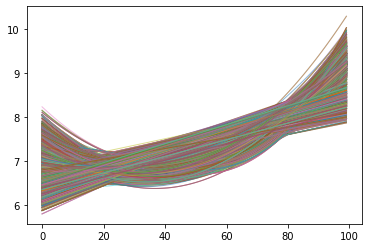

In [12]:
for x in recon:
    plt.plot(x,alpha=.5,linewidth=1)

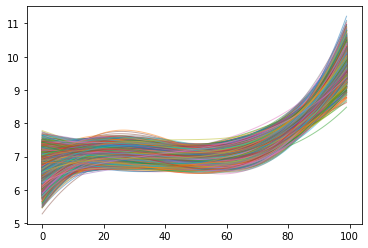

In [10]:
for x in recon_fixed1:
    plt.plot(x,alpha=.5,linewidth=1)

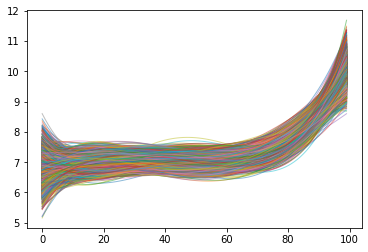

In [11]:
for x in recon_fixed2:
    plt.plot(x,alpha=.5,linewidth=1)

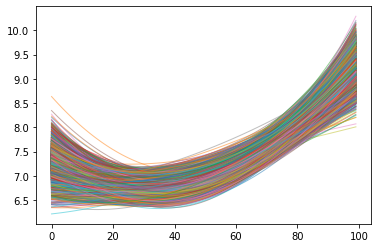

In [12]:
for x in recon_fixed3:
    plt.plot(x,alpha=.5,linewidth=1)

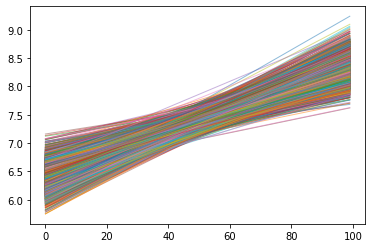

In [13]:
for x in recon_fixed4:
    plt.plot(x,alpha=.5,linewidth=1)

In [13]:
up = np.quantile(recon,.9,axis=0)
down = np.quantile(recon,.1,axis=0)
up_fixed1 = np.quantile(recon_fixed1,.9,axis=0)
down_fixed1 = np.quantile(recon_fixed1,.1,axis=0)
up_fixed2 = np.quantile(recon_fixed2,.9,axis=0)
down_fixed2 = np.quantile(recon_fixed2,.1,axis=0)
up_fixed3 = np.quantile(recon_fixed3,.9,axis=0)
down_fixed3 = np.quantile(recon_fixed3,.1,axis=0)
up_fixed4 = np.quantile(recon_fixed4,.9,axis=0)
down_fixed4 = np.quantile(recon_fixed4,.1,axis=0)

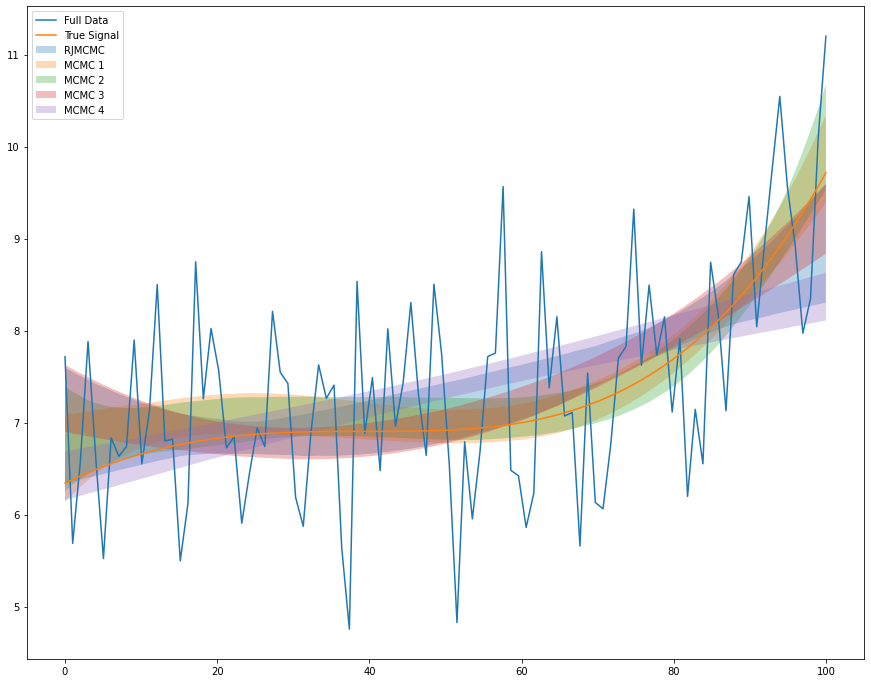

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[15,12])
ax.plot(time,true_data,label='Full Data')
ax.plot(time,true_clean_data,label="True Signal")
ax.fill_between(time,up,down,alpha=.3,label='RJMCMC')
ax.fill_between(time,up_fixed1,down_fixed1,alpha=.3,label='MCMC 1')
ax.fill_between(time,up_fixed2,down_fixed2,alpha=.3,label='MCMC 2')
ax.fill_between(time,up_fixed3,down_fixed3,alpha=.3,label='MCMC 3')
ax.fill_between(time,up_fixed4,down_fixed4,alpha=.3,label='MCMC 4')

ax.legend()

(array([   95.,   940.,  4856., 20717., 38243., 37078., 20014.,  5019.,
          919.,   114.]),
 array([-0.21366713, -0.08642025,  0.04082663,  0.16807351,  0.29532039,
         0.42256726,  0.54981414,  0.67706102,  0.8043079 ,  0.93155478,
         1.05880165]),
 <BarContainer object of 10 artists>)

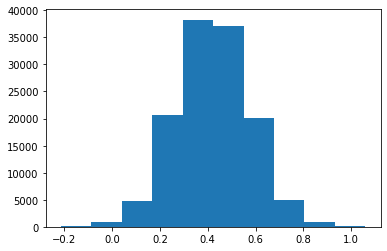

In [27]:
ID = 4
plt.hist(data[0][data[1][:,ID] == 1,ID])

In [17]:
dims = np.sum(data[1],axis=1)

In [27]:
from scipy.integrate import trapz,quad
from scipy.interpolate import interp1d
Ts= [T1,T2,T3,T4]
LLs = [IL1,IL2,IL3,IL4]
lnE = []
for ct in np.arange(len([IL1,IL2,IL3,IL4])):
    
    betas = np.flip(1/Ts[ct][:len(LLs[ct])-1])
    LL = np.flip(LLs[ct][:-1])
    func1 = interp1d(betas,LL,kind='cubic')
    evidence = quad(func1, betas[0],betas[-1])[0]
    evidencetrapz = trapz(LL,x=betas)
    print(evidencetrapz)
    lnE.append(evidence)
print(lnE)
print(evidence1,evidence2,evidence3,evidence4)

-154.94935851038025
-158.36846856845125
-154.80222498957193
-158.2560815146605
[-154.70053591538914, -158.10899946422978, -154.58127558696964, -158.06844451519189]
-151.25118357045355 -141.27632849856428 -152.16412394043797 -158.1436365905243


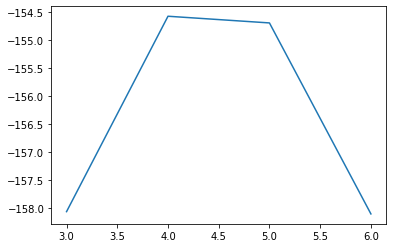

In [28]:
plt.plot(mids[2:6],[lnE[3],lnE[2],lnE[0],lnE[1]])

In [29]:
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(lnE[0] - lnE[1]))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(lnE[0] - lnE[2]))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(lnE[0] - lnE[3]))
print("Bayes factor 4/3 (RJ): ",np.sum(dims == 4) / np.sum(dims==3))
print("Bayes factor 4/3 (PTMCMC): ",np.exp(lnE[2] -lnE[3]))

Bayes factor 5/6 (RJ):  612.7832167832167
Bayes factor 5/6 (PTMCMC):  30.218778894792006
Bayes factor 5/4 (RJ):  0.039971846186759405
Bayes factor 5/4 (PTMCMC):  0.887576709241508
Bayes factor 5/3 (RJ):  0.05100044756635069
Bayes factor 5/3 (PTMCMC):  29.017775770343437
Bayes factor 4/3 (RJ):  1.2759092319144492
Bayes factor 4/3 (PTMCMC):  32.69325960022206


[1.00000000e+00 7.23333292e-01 5.26582262e-01 3.88806036e-01
 2.88946099e-01 2.17564663e-01 1.65892221e-01 1.29254587e-01
 1.02645335e-01 8.39887897e-02 7.03391922e-02 5.97632859e-02
 5.06973154e-02 4.15415877e-02 3.17258992e-02 2.08670493e-02
 1.06698879e-02 4.01924911e-03 7.58394366e-04 1.00000000e-08]
[  -137.74968375   -138.81948524   -140.31090172   -142.24167429
   -144.87577336   -148.81580439   -154.10700895   -161.53735263
   -172.16252841   -187.33170947   -207.01972191   -230.25771788
   -256.15961793   -281.4062596    -305.63467382   -329.44510664
   -356.97402936   -402.52921385   -531.44682196 -54956.02076404]


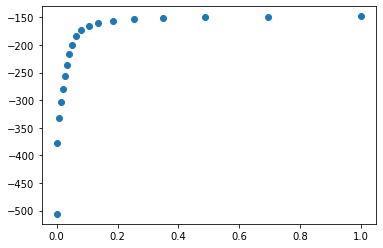

In [19]:
plt.scatter(1/T4[:len(IL4[:-1])],IL4[:-1])
print(1/T1[:len(IL1[:])])
print(IL1)
#plt.plot(IL2[:-1])
#plt.plot(IL3[:-1])
#plt.plot(IL4[:-1])

In [20]:
print(ILNUM1)
print(ILNUM2)
print(ILNUM3)
print(ILNUM4)
print(T1)

[599970 600000 600000 600000 600000 600000 600000 600000 600000 600000
 600000 600000 600000 600000 600000 600000 600000 600000 600000 600000]
[599970 600000 600000 600000 600000 600000 600000 600000 600000 600000
 600000 600000 600000 600000 600000 600000 600000 600000 600000 600000]
[499975 500000 500000 500000 500000 500000 500000 500000 500000 500000
 500000 500000 500000 500000 500000 500000 500000 500000 500000 500000]
[699965 700000 700000 700000 700000 700000 700000 700000 700000 700000
 700000 700000 700000 700000 700000 700000 700000 700000 700000 700000]
[1.00000000e+00 1.38248856e+00 1.89903852e+00 2.57197653e+00
 3.46085309e+00 4.59633465e+00 6.02801019e+00 7.73666935e+00
 9.74228395e+00 1.19063509e+01 1.42168252e+01 1.67326810e+01
 1.97249103e+01 2.40722624e+01 3.15199892e+01 4.79224440e+01
 9.37216973e+01 2.48802692e+02 1.31857520e+03 1.00000000e+08
 1.00000000e+00 1.38248856e+00 1.89903852e+00 2.57197653e+00
 3.46085309e+00 4.59633465e+00 6.02801019e+00 7.73666935e+00
 

0
10
20
30
40
50
60
70
80
90
-137.72707532746116


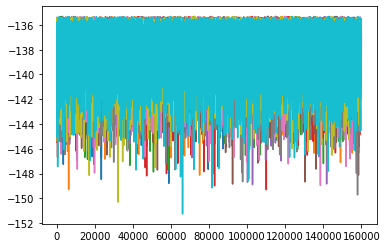

In [36]:
f1 = h5py.File("../data/output_trans_fixed_dim1.hdf5",'r')
LLLP1 = f1["MCMC_OUTPUT"]["LOGL_LOGP"]
num =0
ave = 0
ensemble_member = 9
ensemble_size = 10
for c in LLLP1.keys():
    chain = int(c[5:])
    #if chain%ensemble_size == ensemble_member:
    if True:
        print(chain)
        ave+= np.sum(LLLP1[c][:,0])
        num+=len(LLLP1[c][:,0])
        plt.plot(LLLP1[c][:,0])
print(ave/num)